**COVID19 CT Pneumonia Detection**
with Transfer Learning: An implementation in Tensorflow and Keras

In [3]:
from numpy.random import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7) #2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
print(os.listdir("D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/two"))

['link source dataset.txt', 'test', 'train']


In [5]:
from os import listdir
data_list = listdir('D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/two/train')

data_list

['covid', 'normal']

In [6]:
train_path = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/two/train'
test_path = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/two/test'

Case 1: COVID vs Normal
VGG Initialization

In [7]:
import numpy as np
import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import *
%matplotlib inline

Using TensorFlow backend.


In [8]:
from keras.metrics import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
IMAGE_SIZE    = (150, 150) 
BATCH_SIZE    = 11
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0005

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')                                                 

train_batches = train_datagen.flow_from_directory(train_path,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="binary",
                                                 
                                                  )

valid_batches = train_datagen.flow_from_directory(train_path,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="binary",
                                                  
                                                 
                                                  )

test_batches = train_datagen.flow_from_directory(test_path, 
                                                 target_size=IMAGE_SIZE, 
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True,
                                                 seed=42,
                                                 class_mode="binary"
                                                )

C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


Layer Modification at upper layer of VGG16

In [10]:
#Simple CNN model based on VGG16
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.normalization import BatchNormalization

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, trainable=True, activation='relu'))   #Rectified Linear Unit
model.add(layers.Dense(1, trainable=True, activation='sigmoid'))  #Sigmoid activation function


In [11]:
model.compile(loss='binary_crossentropy',
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [13]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,steps_per_epoch=10, validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID, epochs = NUM_EPOCHS
                           
                       )

10
3
Epoch 1/10


C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 7s 742ms/step - loss: 1.0578 - acc: 0.5769 - val_loss: 0.7023 - val_acc: 0.6818
Epoch 2/10
10/10 [==============================] - 6s 566ms/step - loss: 0.7019 - acc: 0.5769 - val_loss: 0.2701 - val_acc: 0.8667
Epoch 3/10
10/10 [==============================] - 5s 548ms/step - loss: 0.3347 - acc: 0.8750 - val_loss: 0.3852 - val_acc: 0.9333
Epoch 4/10
10/10 [==============================] - 6s 605ms/step - loss: 0.2965 - acc: 0.8654 - val_loss: 0.3922 - val_acc: 0.9091
Epoch 5/10
10/10 [==============================] - 6s 605ms/step - loss: 0.2697 - acc: 0.9135 - val_loss: 0.1835 - val_acc: 0.9333
Epoch 6/10
10/10 [==============================] - 5s 547ms/step - loss: 0.2383 - acc: 0.9038 - val_loss: 0.2936 - val_acc: 1.0000
Epoch 7/10
10/10 [==============================] - 6s 575ms/step - loss: 0.2201 - acc: 0.9135 - val_loss: 0.1531 - val_acc: 0.9545
Epoch 8/10
10/10 [==============================] - 6s 573ms/step - loss: 0.1916 - acc:

Training

In [14]:
def plots (ims,figsize=(12,12), rows=3, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[1], interpolation=None if interp else 'None')

In [15]:
test_imgs, test_labels = next(test_batches)

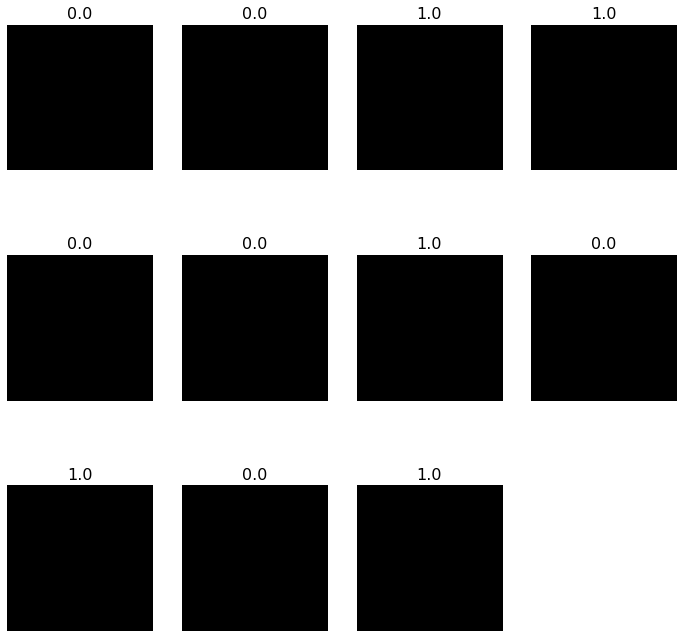

In [16]:
plots(test_imgs, titles = test_labels)

In [17]:
test_labels = test_labels
test_labels

array([0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.], dtype=float32)

In [19]:
#count the total
j=0
y=0
for i in test_labels:
    if i == 0:
        j=j+1
    else:
        y=y+1
print('COVID19 Pneumonia:' ,j)    
print('Normal:',y)

COVID19 Pneumonia: 6
Normal: 5


Evaluation

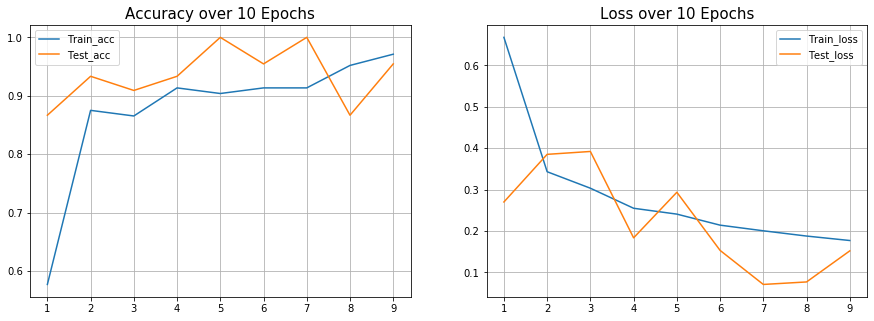

In [20]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, NUM_EPOCHS)

In [21]:
model.save('COVID-PNEUMONIA_VGG16_141.h5')

In [22]:
#Dont forget shuffle false. Note that Shuffle False is necessary for predict generator due to Keras's internal shuffling.

test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_path,target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=False,
        seed=42,
        
        
        class_mode="binary")
eval_generator.reset()    



Found 11 images belonging to 2 classes.


In [24]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])



1/1 [==============================] - 1s 773ms/step
Test loss: 0.06967625021934509
Test accuracy: 1.0


Predict

In [25]:
eval_generator.reset()  
pred = model.predict_generator(eval_generator, steps=1, verbose=0)
print("Predictions finished")

Predictions finished


In [26]:
pred

array([[0.13382486],
       [0.10153329],
       [0.02499568],
       [0.07444489],
       [0.0107542 ],
       [0.00962025],
       [0.9446076 ],
       [0.7959123 ],
       [0.961203  ],
       [0.9672546 ],
       [0.96615064]], dtype=float32)

In [27]:
j=0
y=0
for i in pred:
    if i > 0.5:
        j=j+1
    else:
        y=y+1
print('Normal:',j)    
print('COVID19 Pneumonia:',y)

Normal: 5
COVID19 Pneumonia: 6


In [28]:
predictions = np.where(pred >= 0.5, 1, 0)

In [29]:
predict = predictions[:,0]
predict

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [30]:
j=0
y=0
for i in predict:
    if i == 1:
        j=j+1
    else:
        y=y+1
print('Prediction:')
print('Normal',j)
print('COVID19 Pneumonia',y)

Prediction:
Normal 5
COVID19 Pneumonia 6


In [42]:
cm = confusion_matrix(test_labels, predictions)
print(cm)

[[4 2]
 [2 3]]


In [133]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
   

Confusion Matrix, without normalization
[[3 3]
 [4 1]]
[[3 3]
 [4 1]]


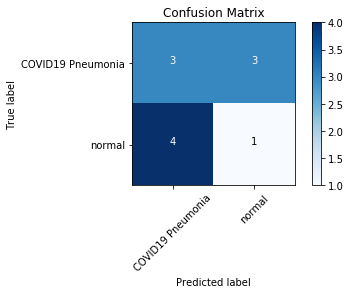

In [134]:
cm_plot_labels = ['COVID19 Pneumonia','normal']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

covid\nejmoa2001191_f4.jpeg


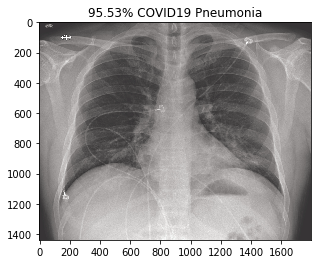

covid\nejmoa2001191_f5-PA.jpeg


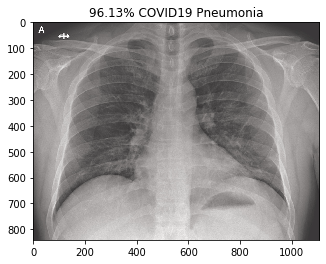

covid\radiol.2020200490.fig3.jpeg


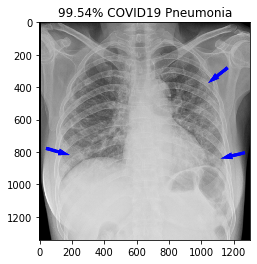

covid\ryct.2020200034.fig2.jpeg


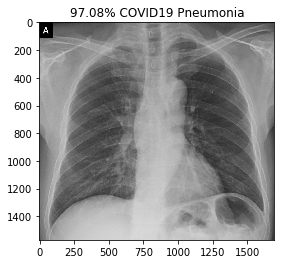

covid\ryct.2020200034.fig5-day0.jpeg


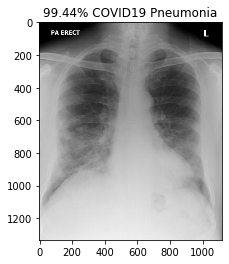

covid\ryct.2020200034.fig5-day4.jpeg


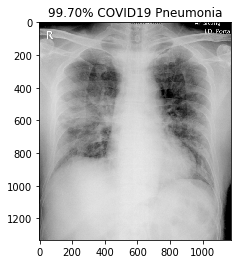

normal\NORMAL2-IM-1385-0001.jpeg


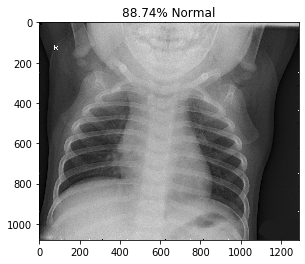

normal\NORMAL2-IM-1396-0001.jpeg


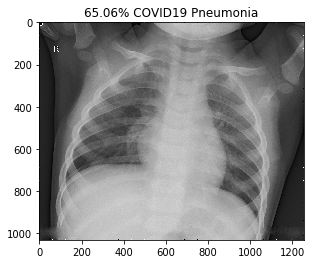

normal\NORMAL2-IM-1400-0001.jpeg


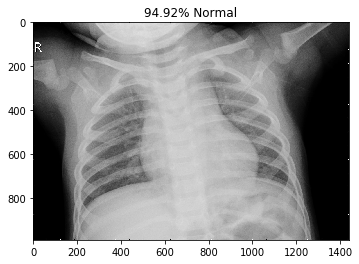

normal\NORMAL2-IM-1401-0001.jpeg


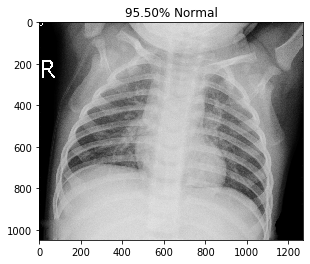

normal\NORMAL2-IM-1422-0001.jpeg


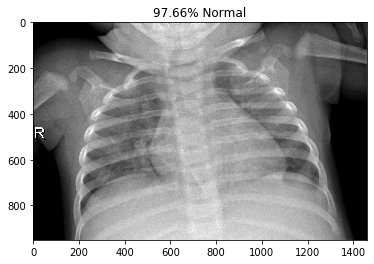

In [127]:
import cv2


import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    image_path = test_path + "/" + eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    #BGR TO RGB conversion using CV2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()